# Exploratory Data Analysis of Fall-Detection Dataset
<ins>References</ins>
- Dataset ([Heart Rate and IMU Sensor Data for Fall Detection](https://github.com/nhoyh/hr_imu_falldetection_dataset))
- Accompanying Article ([Nho, Lim & Kwon, 2020](https://ieeexplore.ieee.org/document/8970371))

In [1]:
# Imports
from utils import *
from mat4py import loadmat
from sklearn.preprocessing import LabelEncoder
import os, re

## Import Fall-Detection Dataset
Load dataset into a `pandas` dataframe by reading the `*.mat` files, or loading the pre-loaded `.pkl` file.

In [2]:

# Initialise empty dataframe
df_dataset = pd.DataFrame(columns=['subject', 'time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart', 'scenario', 'class'])

# Iterate through each subject folder
for folder in os.listdir(DATASET_FOLDER):
    current_folder = os.path.join(DATASET_FOLDER, folder)
    if("subject" in folder):
        subject = folder
        # Iterate through each class (fall or non-fall)
        for fall_class in os.listdir(current_folder):
            current_path = os.path.join(current_folder, fall_class)
            # Iterate through each file
            for file in os.listdir(current_path):
                regex_match = re.match("(.+)\\.mat", file)
                if(regex_match):
                    # Load the .mat file
                    data = loadmat(os.path.join(current_path, file))
                    data['subject'] = subject
                    data['scenario'] = regex_match.group(1)
                    data['class'] = fall_class
                    df_dataset.loc[len(df_dataset)] = data

# Add demographic data
demographic_data = {
                    "subject_01": {"age": 31, "sex": "Male" },
                    "subject_02": {"age": 21, "sex": "Female" },
                    "subject_03": {"age": 28, "sex": "Male" },
                    "subject_04": {"age": 25, "sex": "Male" },
                    "subject_05": {"age": 21, "sex": "Female" },
                    "subject_06": {"age": 28, "sex": "Male" },
                    "subject_07": {"age": 32, "sex": "Male" },
                    "subject_08": {"age": 22, "sex": "Female" },
                    "subject_09": {"age": 27, "sex": "Male" },
                    "subject_10": {"age": 25, "sex": "Male" },
                    "subject_11": {"age": 27, "sex": "Male" },
                    "subject_12": {"age": 26, "sex": "Male" },
                    "subject_13": {"age": 21, "sex": "Female" },
                    "subject_14": {"age": 21, "sex": "Female" },
                    "subject_15": {"age": 29, "sex": "Female" },
                    "subject_16": {"age": 30, "sex": "Male" },
                    "subject_17": {"age": 23, "sex": "Female" },
                    "subject_18": {"age": 28, "sex": "Male" },
                    "subject_19": {"age": 25, "sex": "Male" },
                    "subject_20": {"age": 21, "sex": "Female" },
                    "subject_21": {"age": 30, "sex": "Male" }
                }
df_dataset['age'] = df_dataset['subject'].map(lambda x: demographic_data[x]['age'] if x in demographic_data else None)
df_dataset['sex'] = df_dataset['subject'].map(lambda x: demographic_data[x]['sex'] if x in demographic_data else None)

# Reorder columns and sort dataset
df_dataset = df_dataset[['subject', 'age', 'sex', 'class', 'scenario', 'time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart']]
df_dataset = df_dataset.sort_values(by=['subject', 'class', 'scenario'])
df_dataset.reset_index(inplace=True, drop=True)

# Encode the scenario labels
label_encoder = LabelEncoder()
df_dataset['scenario_encoded'] = label_encoder.fit_transform(df_dataset['scenario'])
print("Scenario mapping:", dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_)))
df_dataset['class_encoded'] = label_encoder.fit_transform(df_dataset['class'])
print("Class mapping:", dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_)))

# Export dataframe
pickle_object(df_dataset, DATASET_FILE)

Scenario mapping: {0: 'bed', 1: 'chair', 2: 'clap', 3: 'cloth', 4: 'eat', 5: 'fall1', 6: 'fall2', 7: 'fall3', 8: 'fall4', 9: 'fall5', 10: 'fall6', 11: 'hair', 12: 'shoe', 13: 'stair', 14: 'teeth', 15: 'walk', 16: 'wash', 17: 'write', 18: 'zip'}
Class mapping: {0: 'fall', 1: 'non-fall'}


In [3]:
# Import dataframe from file
# df_dataset = load_pickle(DATASET_FILE)

## Preliminary Analysis

In [4]:
print("Dimensions of preliminary dataset:", df_dataset.shape)

Dimensions of preliminary dataset: (349, 19)


In [5]:
df_dataset.head()

,subject,age,sex,class,scenario,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart,scenario_encoded,class_encoded
0,subject_01,31,Male,fall,fall1,"[[2018.0, 5.0, 11.0, 13.0, 17.0, 2.825], [2018...","[[-0.8331], [-0.8331], [-0.8331], [-0.8331], [...","[[0.4897], [0.4897], [0.4897], [0.4897], [0.48...","[[0.1678], [0.1679], [0.168], [0.1679], [0.168...","[[-0.1942], [-0.1942], [-0.1942], [-0.1943], [...","[[-0.7], [-0.9], [-0.4], [-0.4], [-0.5], [-0.8...","[[0.0], [0.2], [0.1], [0.2], [0.2], [0.1], [0....","[[1.1], [0.8], [0.8], [0.9], [1.1], [0.9], [1....","[[0.016], [0.015], [0.018], [0.016], [0.015], ...","[[0.014], [0.01], [0.012], [0.013], [0.012], [...","[[0.002], [0.006], [0.002], [0.002], [0.008], ...","[[1023], [1023], [1023], [1023], [1023], [1023...",5,0
1,subject_01,31,Male,fall,fall2,"[[2018.0, 5.0, 11.0, 13.0, 23.0, 23.547], [201...","[[-0.2803], [-0.2803], [-0.2802], [-0.2802], [...","[[-0.6516], [-0.6518], [-0.652], [-0.6521], [-...","[[0.6375], [0.6374], [0.6372], [0.637], [0.636...","[[0.3003], [0.3003], [0.3003], [0.3003], [0.30...","[[-0.4], [-0.6], [-0.5], [-0.6], [-0.6], [-0.9...","[[0.0], [0.2], [0.2], [0.1], [0.1], [0.2], [0....","[[0.8], [0.8], [0.8], [0.8], [0.8], [1.1], [1....","[[-0.013], [-0.013], [-0.014], [-0.011], [-0.0...","[[0.002], [0.002], [0.002], [0.002], [-0.001],...","[[-0.016], [-0.012], [-0.015], [-0.012], [-0.0...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",6,0
2,subject_01,31,Male,fall,fall3,"[[2018.0, 5.0, 11.0, 13.0, 30.0, 57.327], [201...","[[0.4041], [0.4042], [0.4042], [0.4042], [0.40...","[[-0.2569], [-0.257], [-0.257], [-0.257], [-0....","[[0.0057], [0.0059], [0.006], [0.0061], [0.006...","[[-0.8778], [-0.8777], [-0.8777], [-0.8777], [...","[[-1.2], [-1.4], [-1.2], [-0.9], [-0.9], [-0.5...","[[-0.1], [-0.1], [-0.1], [-0.2], [-0.2], [0.1]...","[[0.5], [0.6], [0.9], [1.0], [1.2], [1.4], [1....","[[0.004], [0.0], [0.003], [0.009], [0.015], [0...","[[0.001], [-0.004], [-0.002], [0.0], [0.0], [-...","[[-0.002], [0.001], [-0.003], [0.001], [-0.002...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",7,0
3,subject_01,31,Male,fall,fall4,"[[2018.0, 5.0, 11.0, 13.0, 32.0, 40.959], [201...","[[0.6932], [0.6934], [0.6932], [0.6931], [0.69...","[[-0.3212], [-0.3212], [-0.3213], [-0.3214], [...","[[0.3334], [0.3334], [0.3334], [0.3335], [0.33...","[[-0.5522], [-0.552], [-0.5522], [-0.5521], [-...","[[-0.4], [-0.8], [-1.2], [-1.3], [-0.7], [-0.4...","[[0.2], [0.1], [-0.1], [0.0], [0.0], [0.1], [0...","[[0.8], [0.8], [1.0], [0.8], [1.0], [0.8], [0....","[[0.008], [0.012], [0.014], [0.014], [0.015], ...","[[0.017], [0.014], [0.017], [0.017], [0.011], ...","[[0.0], [0.0], [0.0], [-0.002], [-0.003], [0.0...","[[1023], [1023], [1023], [1023], [1023], [0], ...",8,0
4,subject_01,31,Male,fall,fall6,"[[2018.0, 5.0, 11.0, 13.0, 36.0, 19.385], [201...","[[0.124], [0.124], [0.124], [0.124], [0.1239],...","[[0.9614], [0.9615], [0.9615], [0.9616], [0.96...","[[-0.2451], [-0.2449], [-0.2448], [-0.2446], [...","[[-0.0084], [-0.0083], [-0.0083], [-0.0083], [...","[[-0.6], [-0.4], [-0.6], [-0.7], [-0.7], [-0.6...","[[0.1], [0.0], [0.0], [0.0], [0.0], [0.2], [0....","[[0.8], [0.9], [0.8], [0.8], [1.0], [1.0], [1....","[[-0.005], [-0.008], [-0.006], [-0.007], [-0.0...","[[-0.012], [-0.008], [-0.008], [-0.008], [-0.0...","[[-0.009], [-0.008], [-0.013], [-0.008], [-0.0...","[[0], [0], [0], [0], [0], [0], [1023], [1023],...",10,0


### Distribution of Data by Count

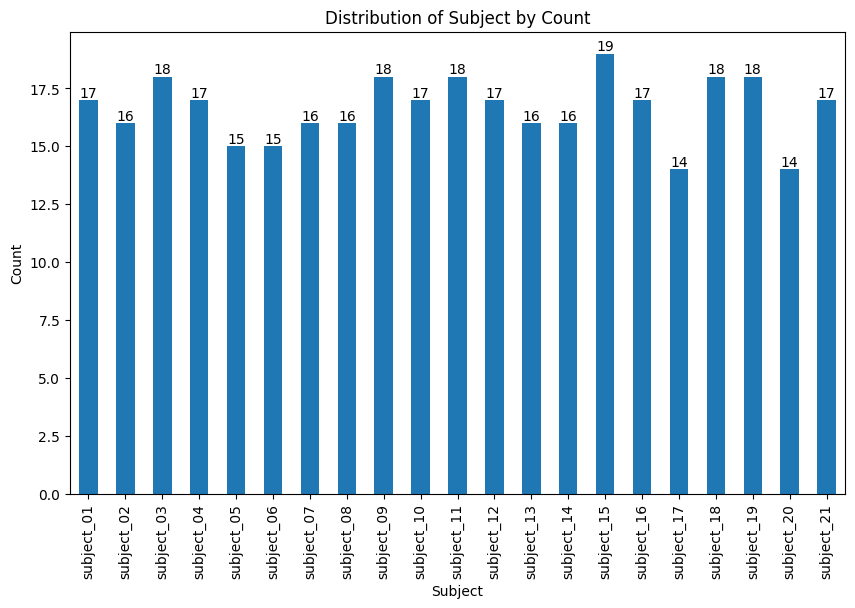

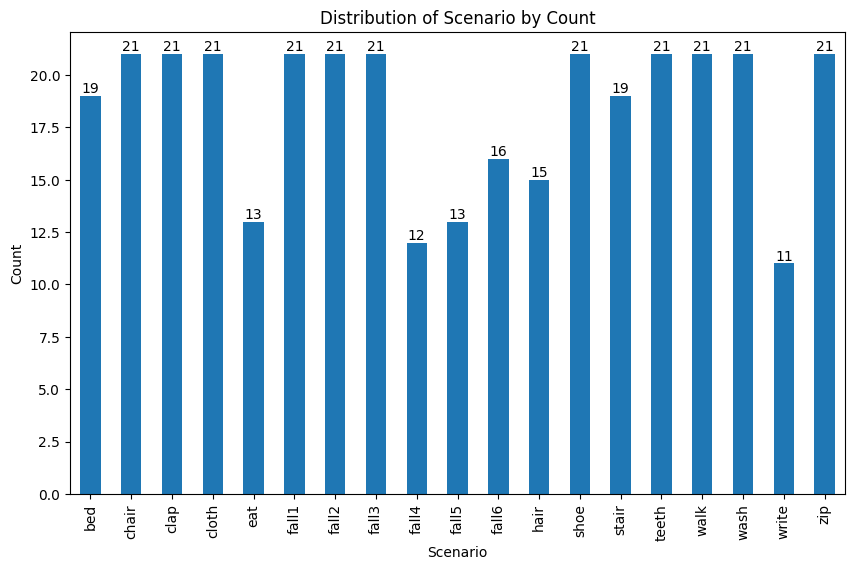

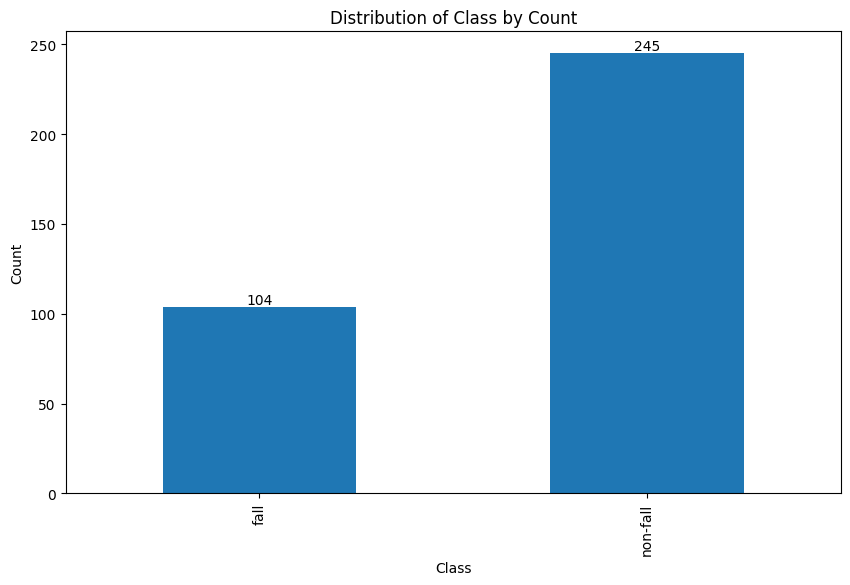

In [6]:
""" Plot distribution of columns by count """
for column in ['subject', 'scenario', 'class']:
    # Get value counts and sort by index
    value_counts = df_dataset[column].value_counts().sort_index()

    # Plot bar chart
    plt.figure(figsize=(10, 6))
    ax = value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column.capitalize()} by Count')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')

    # Add value labels on top of each bar
    for idx, value in enumerate(value_counts):
        ax.text(idx, value, str(value), ha='center', va='bottom')
    plt.show()

We observe 14 common scenarios found across all 21 subjects. 

Specifically, class imbalances occured due to non-full participation of subjects in the following scenarios:
- `fall`
    - `fall4`
    - `fall5`
    - `fall6`
- `non-fall`
    - `bed`
    - `eat`
    - `hair`
    - `stair`
    - `white`

### Distribution of Data by Subjects

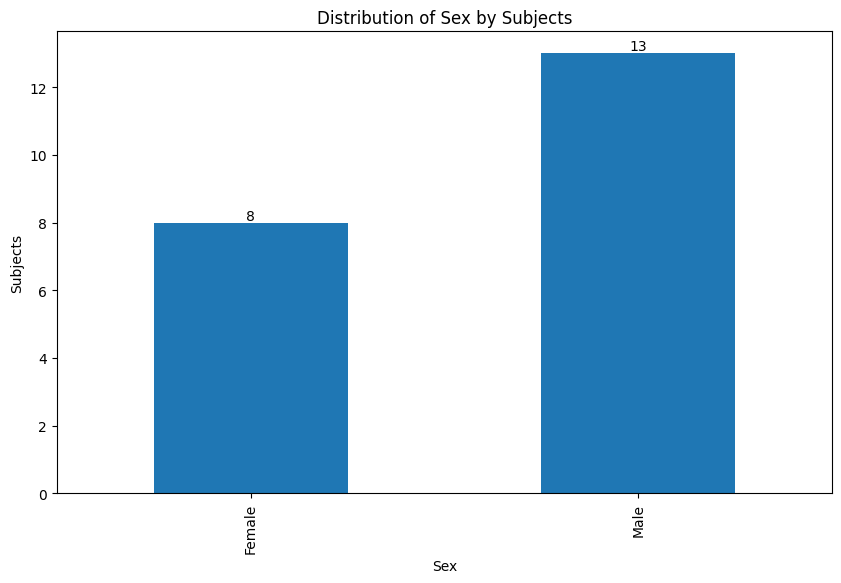

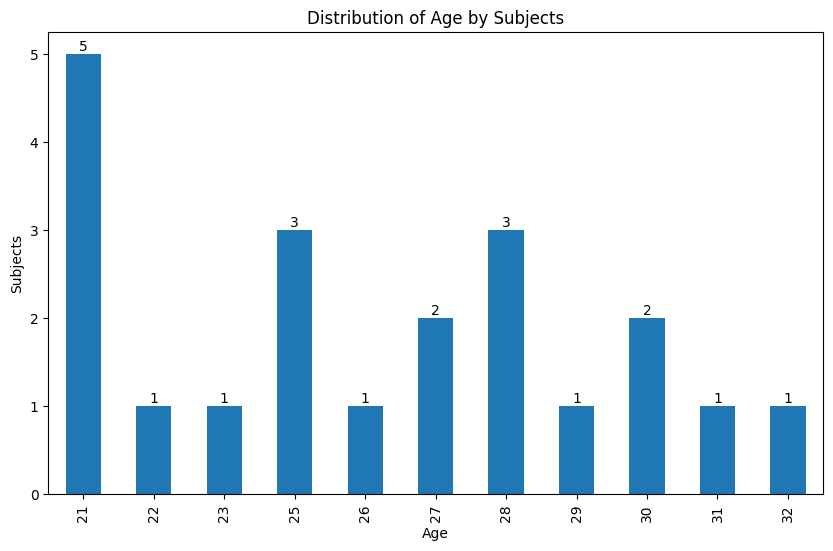

In [7]:
""" Plot distribution of columns by subjects """
for column in ['sex', 'age']:
    # Compute value counts based on unique subjects
    value_counts = df_dataset.groupby(column)['subject'].nunique().sort_index()
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    ax = value_counts.plot(kind='bar')
    plt.title(f'Distribution of {column.capitalize()} by Subjects')
    plt.xlabel(column.capitalize())
    plt.ylabel('Subjects')
    
    # Add value labels on top of each bar
    for idx, value in enumerate(value_counts):
        ax.text(idx, value, str(value), ha='center', va='bottom')
    plt.show()

## Split dataset into Training and Validation Sets
Due to complexities in catering to inherent feature imbalances within the dataset, we perform a simple `80:20` train-test split using the assigned **subject numbers**.

In [8]:
# Split subjects into train and validation
subject_counts = df_dataset['subject'].value_counts()
val_subjects = subject_counts.sample(frac=SPLIT_SIZE, random_state=RAND_SEED).index
train_subjects = subject_counts[~subject_counts.index.isin(val_subjects)].index

# Create train and validation datasets
df_train = df_dataset[df_dataset['subject'].isin(train_subjects)]
df_val = df_dataset[df_dataset['subject'].isin(val_subjects)]
df_train.reset_index(inplace=True, drop=True)
df_val.reset_index(inplace=True, drop=True)

# Export dataframe
pickle_object(df_train, TRAIN_DATASET_FILE)
pickle_object(df_val, VAL_DATASET_FILE)

#### Preview Training Dataset

In [9]:
print("Dimensions of training dataset:", df_train.shape)

Dimensions of training dataset: (286, 19)


In [10]:
df_train.head()

,subject,age,sex,class,scenario,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart,scenario_encoded,class_encoded
0,subject_03,28,Male,fall,fall1,"[[2018.0, 4.0, 24.0, 22.0, 45.0, 27.845], [201...","[[0.2141], [0.214], [0.2141], [0.2141], [0.214...","[[-0.124], [-0.1239], [-0.124], [-0.1241], [-0...","[[-0.2819], [-0.2816], [-0.2816], [-0.2818], [...","[[0.9269], [0.927], [0.927], [0.9269], [0.9269...","[[1.4], [0.0], [-1.0], [-0.7], [0.0], [0.0], [...","[[0.3], [0.0], [-0.2], [-0.2], [0.0], [0.0], [...","[[-0.2], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[[0.001], [-0.002], [-0.002], [0.0], [0.0], [-...","[[0.018], [0.024], [0.013], [0.004], [0.006], ...","[[-0.015], [-0.012], [-0.012], [-0.007], [-0.0...","[[1023], [1023], [1023], [1023], [1023], [1023...",5,0
1,subject_03,28,Male,fall,fall2,"[[2018.0, 4.0, 24.0, 22.0, 0.0, 0.02], [2018.0...","[[0.1301], [0.1301], [0.1301], [0.1301], [0.13...","[[0.0008], [0.0008], [0.0008], [0.0007], [0.00...","[[0.4273], [0.4272], [0.4271], [0.4272], [0.42...","[[-0.8946], [-0.8947], [-0.8947], [-0.8947], [...","[[0.7], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.3], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[-0.004], [-0.007], [-0.005], [-0.005], [-0.0...","[[0.017], [0.017], [0.012], [0.004], [0.006], ...","[[-0.01], [-0.008], [-0.008], [-0.011], [-0.01...","[[1023], [1023], [1023], [1023], [1023], [1023...",6,0
2,subject_03,28,Male,fall,fall3,"[[2018.0, 4.0, 24.0, 23.0, 13.0, 39.353], [201...","[[-0.0177], [-0.0177], [-0.0177], [-0.0178], [...","[[-0.227], [-0.227], [-0.2269], [-0.2268], [-0...","[[0.2847], [0.2846], [0.2847], [0.2848], [0.28...","[[-0.9311], [-0.9311], [-0.9311], [-0.9311], [...","[[0.0], [-0.4], [-0.8], [-0.4], [-0.7], [-0.6]...","[[0.0], [-0.4], [-0.4], [-0.4], [-0.4], [-0.3]...","[[0.0], [-0.5], [-0.4], [-0.5], [-0.6], [-0.6]...","[[0.005], [0.005], [0.007], [0.006], [0.006], ...","[[0.008], [0.018], [0.009], [0.003], [0.014], ...","[[-0.001], [-0.012], [-0.009], [-0.004], [-0.0...","[[1023], [1023], [1023], [1023], [1023], [1023...",7,0
3,subject_03,28,Male,fall,fall4,"[[2018.0, 4.0, 24.0, 23.0, 16.0, 17.987], [201...","[[0.2212], [0.2212], [0.2212], [0.2212], [0.22...","[[-0.043], [-0.043], [-0.043], [-0.043], [-0.0...","[[0.3383], [0.3383], [0.3383], [0.3382], [0.33...","[[-0.9136], [-0.9136], [-0.9136], [-0.9136], [...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [-0.003], [-0.003], [-0.001], [-0.001]...","[[0.009], [0.008], [0.009], [0.009], [0.008], ...","[[-0.014], [-0.012], [-0.006], [-0.013], [-0.0...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",8,0
4,subject_03,28,Male,fall,fall6,"[[2018.0, 4.0, 24.0, 23.0, 20.0, 59.831], [201...","[[0.4924], [0.4923], [0.4922], [0.4922], [0.49...","[[-0.2613], [-0.2614], [-0.2614], [-0.2614], [...","[[0.813], [0.813], [0.813], [0.8131], [0.8131]...","[[0.1679], [0.168], [0.168], [0.168], [0.168],...","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.002], [0.003], [0.002], [0.0], [0.003], [0...","[[0.001], [0.002], [0.001], [0.003], [0.002], ...","[[-0.01], [-0.007], [-0.006], [0.0], [0.0], [-...","[[1023], [1023], [1023], [1023], [1023], [1023...",10,0


#### Preview Validation Dataset

In [11]:
print("Dimensions of validation dataset:", df_val.shape)

Dimensions of validation dataset: (63, 19)


In [12]:
df_val.head()

,subject,age,sex,class,scenario,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart,scenario_encoded,class_encoded
0,subject_01,31,Male,fall,fall1,"[[2018.0, 5.0, 11.0, 13.0, 17.0, 2.825], [2018...","[[-0.8331], [-0.8331], [-0.8331], [-0.8331], [...","[[0.4897], [0.4897], [0.4897], [0.4897], [0.48...","[[0.1678], [0.1679], [0.168], [0.1679], [0.168...","[[-0.1942], [-0.1942], [-0.1942], [-0.1943], [...","[[-0.7], [-0.9], [-0.4], [-0.4], [-0.5], [-0.8...","[[0.0], [0.2], [0.1], [0.2], [0.2], [0.1], [0....","[[1.1], [0.8], [0.8], [0.9], [1.1], [0.9], [1....","[[0.016], [0.015], [0.018], [0.016], [0.015], ...","[[0.014], [0.01], [0.012], [0.013], [0.012], [...","[[0.002], [0.006], [0.002], [0.002], [0.008], ...","[[1023], [1023], [1023], [1023], [1023], [1023...",5,0
1,subject_01,31,Male,fall,fall2,"[[2018.0, 5.0, 11.0, 13.0, 23.0, 23.547], [201...","[[-0.2803], [-0.2803], [-0.2802], [-0.2802], [...","[[-0.6516], [-0.6518], [-0.652], [-0.6521], [-...","[[0.6375], [0.6374], [0.6372], [0.637], [0.636...","[[0.3003], [0.3003], [0.3003], [0.3003], [0.30...","[[-0.4], [-0.6], [-0.5], [-0.6], [-0.6], [-0.9...","[[0.0], [0.2], [0.2], [0.1], [0.1], [0.2], [0....","[[0.8], [0.8], [0.8], [0.8], [0.8], [1.1], [1....","[[-0.013], [-0.013], [-0.014], [-0.011], [-0.0...","[[0.002], [0.002], [0.002], [0.002], [-0.001],...","[[-0.016], [-0.012], [-0.015], [-0.012], [-0.0...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",6,0
2,subject_01,31,Male,fall,fall3,"[[2018.0, 5.0, 11.0, 13.0, 30.0, 57.327], [201...","[[0.4041], [0.4042], [0.4042], [0.4042], [0.40...","[[-0.2569], [-0.257], [-0.257], [-0.257], [-0....","[[0.0057], [0.0059], [0.006], [0.0061], [0.006...","[[-0.8778], [-0.8777], [-0.8777], [-0.8777], [...","[[-1.2], [-1.4], [-1.2], [-0.9], [-0.9], [-0.5...","[[-0.1], [-0.1], [-0.1], [-0.2], [-0.2], [0.1]...","[[0.5], [0.6], [0.9], [1.0], [1.2], [1.4], [1....","[[0.004], [0.0], [0.003], [0.009], [0.015], [0...","[[0.001], [-0.004], [-0.002], [0.0], [0.0], [-...","[[-0.002], [0.001], [-0.003], [0.001], [-0.002...","[[0], [0], [0], [0], [0], [0], [0], [0], [0], ...",7,0
3,subject_01,31,Male,fall,fall4,"[[2018.0, 5.0, 11.0, 13.0, 32.0, 40.959], [201...","[[0.6932], [0.6934], [0.6932], [0.6931], [0.69...","[[-0.3212], [-0.3212], [-0.3213], [-0.3214], [...","[[0.3334], [0.3334], [0.3334], [0.3335], [0.33...","[[-0.5522], [-0.552], [-0.5522], [-0.5521], [-...","[[-0.4], [-0.8], [-1.2], [-1.3], [-0.7], [-0.4...","[[0.2], [0.1], [-0.1], [0.0], [0.0], [0.1], [0...","[[0.8], [0.8], [1.0], [0.8], [1.0], [0.8], [0....","[[0.008], [0.012], [0.014], [0.014], [0.015], ...","[[0.017], [0.014], [0.017], [0.017], [0.011], ...","[[0.0], [0.0], [0.0], [-0.002], [-0.003], [0.0...","[[1023], [1023], [1023], [1023], [1023], [0], ...",8,0
4,subject_01,31,Male,fall,fall6,"[[2018.0, 5.0, 11.0, 13.0, 36.0, 19.385], [201...","[[0.124], [0.124], [0.124], [0.124], [0.1239],...","[[0.9614], [0.9615], [0.9615], [0.9616], [0.96...","[[-0.2451], [-0.2449], [-0.2448], [-0.2446], [...","[[-0.0084], [-0.0083], [-0.0083], [-0.0083], [...","[[-0.6], [-0.4], [-0.6], [-0.7], [-0.7], [-0.6...","[[0.1], [0.0], [0.0], [0.0], [0.0], [0.2], [0....","[[0.8], [0.9], [0.8], [0.8], [1.0], [1.0], [1....","[[-0.005], [-0.008], [-0.006], [-0.007], [-0.0...","[[-0.012], [-0.008], [-0.008], [-0.008], [-0.0...","[[-0.009], [-0.008], [-0.013], [-0.008], [-0.0...","[[0], [0], [0], [0], [0], [0], [1023], [1023],...",10,0


## Alternative: Expand Datasets
Another alternative way of using the dataset would be to expand each row to account for sensor readings which are stored as multi-dimensional lists. However, we will not utilise this for our experiments.

In [13]:
# Expand datasets
df_dataset_expand = expand_sensor_data(df_dataset, ['time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart'])
df_train_expand = expand_sensor_data(df_train, ['time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart'])
df_val_expand = expand_sensor_data(df_val, ['time', 'w', 'x', 'y', 'z', 'droll', 'dpitch', 'dyaw', 'ax', 'ay', 'az', 'heart'])

# Save expanded datasets
pickle_object(df_dataset_expand, EXPANDED_DATASET_FILE)
pickle_object(df_train_expand, EXPANDED_TRAIN_DATASET_FILE)
pickle_object(df_val_expand, EXPANDED_VAL_DATASET_FILE)

### Preview expanded datasets

#### Expanded Dataset

In [14]:
print("Dimensions of full expanded dataset:", df_dataset_expand.shape)

Dimensions of full expanded dataset: (381394, 19)


In [15]:
df_dataset_expand

,subject,age,sex,class,scenario,scenario_encoded,class_encoded,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart
0,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.825000,-0.8331,0.4897,0.1678,-0.1942,-0.7,0.0,1.1,0.016,0.014,0.002,1023
1,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.828999,-0.8331,0.4897,0.1679,-0.1942,-0.9,0.2,0.8,0.015,0.010,0.006,1023
2,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.847000,-0.8331,0.4897,0.1680,-0.1942,-0.4,0.1,0.8,0.018,0.012,0.002,1023
3,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.884999,-0.8331,0.4897,0.1679,-0.1943,-0.4,0.2,0.9,0.016,0.013,0.002,1023
4,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.905000,-0.8332,0.4895,0.1681,-0.1943,-0.5,0.2,1.1,0.015,0.012,0.008,1023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381389,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.295999,0.0770,0.0251,-0.5638,0.8218,26.4,-19.8,3.1,-0.015,0.063,0.010,1023
381390,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.335000,0.0799,0.0237,-0.5584,0.8253,37.8,-19.9,10.6,-0.022,0.114,0.015,1023
381391,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.353999,0.0836,0.0232,-0.5521,0.8292,39.3,-18.8,16.0,-0.010,0.112,-0.039,1023
381392,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.358000,0.0877,0.0233,-0.5463,0.8325,37.5,-15.4,20.2,-0.007,0.089,-0.072,1023


#### Expanded Training Dataset

In [16]:
print("Dimensions of expanded training dataset:", df_train_expand.shape)

Dimensions of expanded training dataset: (311195, 19)


In [17]:
df_train_expand

,subject,age,sex,class,scenario,scenario_encoded,class_encoded,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart
0,subject_03,28,Male,fall,fall1,5,0,2018-04-24 22:45:27.844999,0.2141,-0.1240,-0.2819,0.9269,1.4,0.3,-0.2,0.001,0.018,-0.015,1023
1,subject_03,28,Male,fall,fall1,5,0,2018-04-24 22:45:27.868999,0.2140,-0.1239,-0.2816,0.9270,0.0,0.0,0.0,-0.002,0.024,-0.012,1023
2,subject_03,28,Male,fall,fall1,5,0,2018-04-24 22:45:27.887000,0.2141,-0.1240,-0.2816,0.9270,-1.0,-0.2,0.0,-0.002,0.013,-0.012,1023
3,subject_03,28,Male,fall,fall1,5,0,2018-04-24 22:45:27.905000,0.2141,-0.1241,-0.2818,0.9269,-0.7,-0.2,0.0,0.000,0.004,-0.007,1023
4,subject_03,28,Male,fall,fall1,5,0,2018-04-24 22:45:27.922000,0.2141,-0.1241,-0.2818,0.9269,0.0,0.0,0.0,0.000,0.006,-0.011,1023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311190,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.295999,0.0770,0.0251,-0.5638,0.8218,26.4,-19.8,3.1,-0.015,0.063,0.010,1023
311191,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.335000,0.0799,0.0237,-0.5584,0.8253,37.8,-19.9,10.6,-0.022,0.114,0.015,1023
311192,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.353999,0.0836,0.0232,-0.5521,0.8292,39.3,-18.8,16.0,-0.010,0.112,-0.039,1023
311193,subject_21,30,Male,non-fall,zip,18,1,2018-04-25 17:01:10.358000,0.0877,0.0233,-0.5463,0.8325,37.5,-15.4,20.2,-0.007,0.089,-0.072,1023


#### Expanded Validation Dataset

In [18]:
print("Dimensions of expanded validation dataset:", df_val_expand.shape)

Dimensions of expanded validation dataset: (70199, 19)


In [19]:
df_val_expand

,subject,age,sex,class,scenario,scenario_encoded,class_encoded,time,w,x,y,z,droll,dpitch,dyaw,ax,ay,az,heart
0,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.825000,-0.8331,0.4897,0.1678,-0.1942,-0.7,0.0,1.1,0.016,0.014,0.002,1023
1,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.828999,-0.8331,0.4897,0.1679,-0.1942,-0.9,0.2,0.8,0.015,0.010,0.006,1023
2,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.847000,-0.8331,0.4897,0.1680,-0.1942,-0.4,0.1,0.8,0.018,0.012,0.002,1023
3,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.884999,-0.8331,0.4897,0.1679,-0.1943,-0.4,0.2,0.9,0.016,0.013,0.002,1023
4,subject_01,31,Male,fall,fall1,5,0,2018-05-11 13:17:02.905000,-0.8332,0.4895,0.1681,-0.1943,-0.5,0.2,1.1,0.015,0.012,0.008,1023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70194,subject_20,21,Female,non-fall,zip,18,1,2018-05-17 22:09:04.435999,-0.0178,0.4043,0.0661,-0.9120,-22.1,-11.7,24.3,-0.010,-0.211,-0.148,0
70195,subject_20,21,Female,non-fall,zip,18,1,2018-05-17 22:09:04.455000,-0.0191,0.4063,0.0716,-0.9106,-30.1,-15.6,14.5,0.016,-0.132,-0.090,0
70196,subject_20,21,Female,non-fall,zip,18,1,2018-05-17 22:09:04.472999,-0.0190,0.4092,0.0776,-0.9089,-30.5,-17.8,7.6,0.028,-0.046,-0.035,0
70197,subject_20,21,Female,non-fall,zip,18,1,2018-05-17 22:09:04.496000,-0.0181,0.4124,0.0824,-0.9070,-24.8,-19.4,4.0,0.040,0.024,0.037,0
